# Comprehensive Predictive Modeling of Ames House Prices

1. Introduction (200 words)
•	Overview of Real Estate Price Prediction (100 words): Discuss the significance of predicting real estate prices, its impact on industries like marketing, business intelligence, and urban planning.
•	Scope and Objectives (50 words): Outline the aims of the research, including developing predictive models and evaluating their effectiveness.
•	Structure of the Report (50 words): Briefly describe the structure of the report, summarizing the main sections.


# 2. Exploratory Data Analysis
<br>
<b>2.1 Dataset Description</b>
<br>

•	Description of the Dataset (100 words): Explain the key attributes (e.g., zoning, lot size, building characteristics, neighborhood factors).
•	Source (25 words): Cite the dataset source (e.g., Kaggle, UCI Machine Learning Repository).

<br>
<b>Import libraries</b>

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew

%matplotlib inline
sns.set_style('darkgrid')

<b>Load data</b>

In [158]:
dataset = pd.read_csv("house-price-data-apr2024.csv")
dataset.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,24.284752,9981.264932,1.382997,1.112799,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,7.000000,6.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


<br>

<b>2.1 Feature Distributions Relative to target</b>

A comprehensive initial assessment of how each of the 46 features is distributed relative to the target variable ```SalePrice``` is visualized.


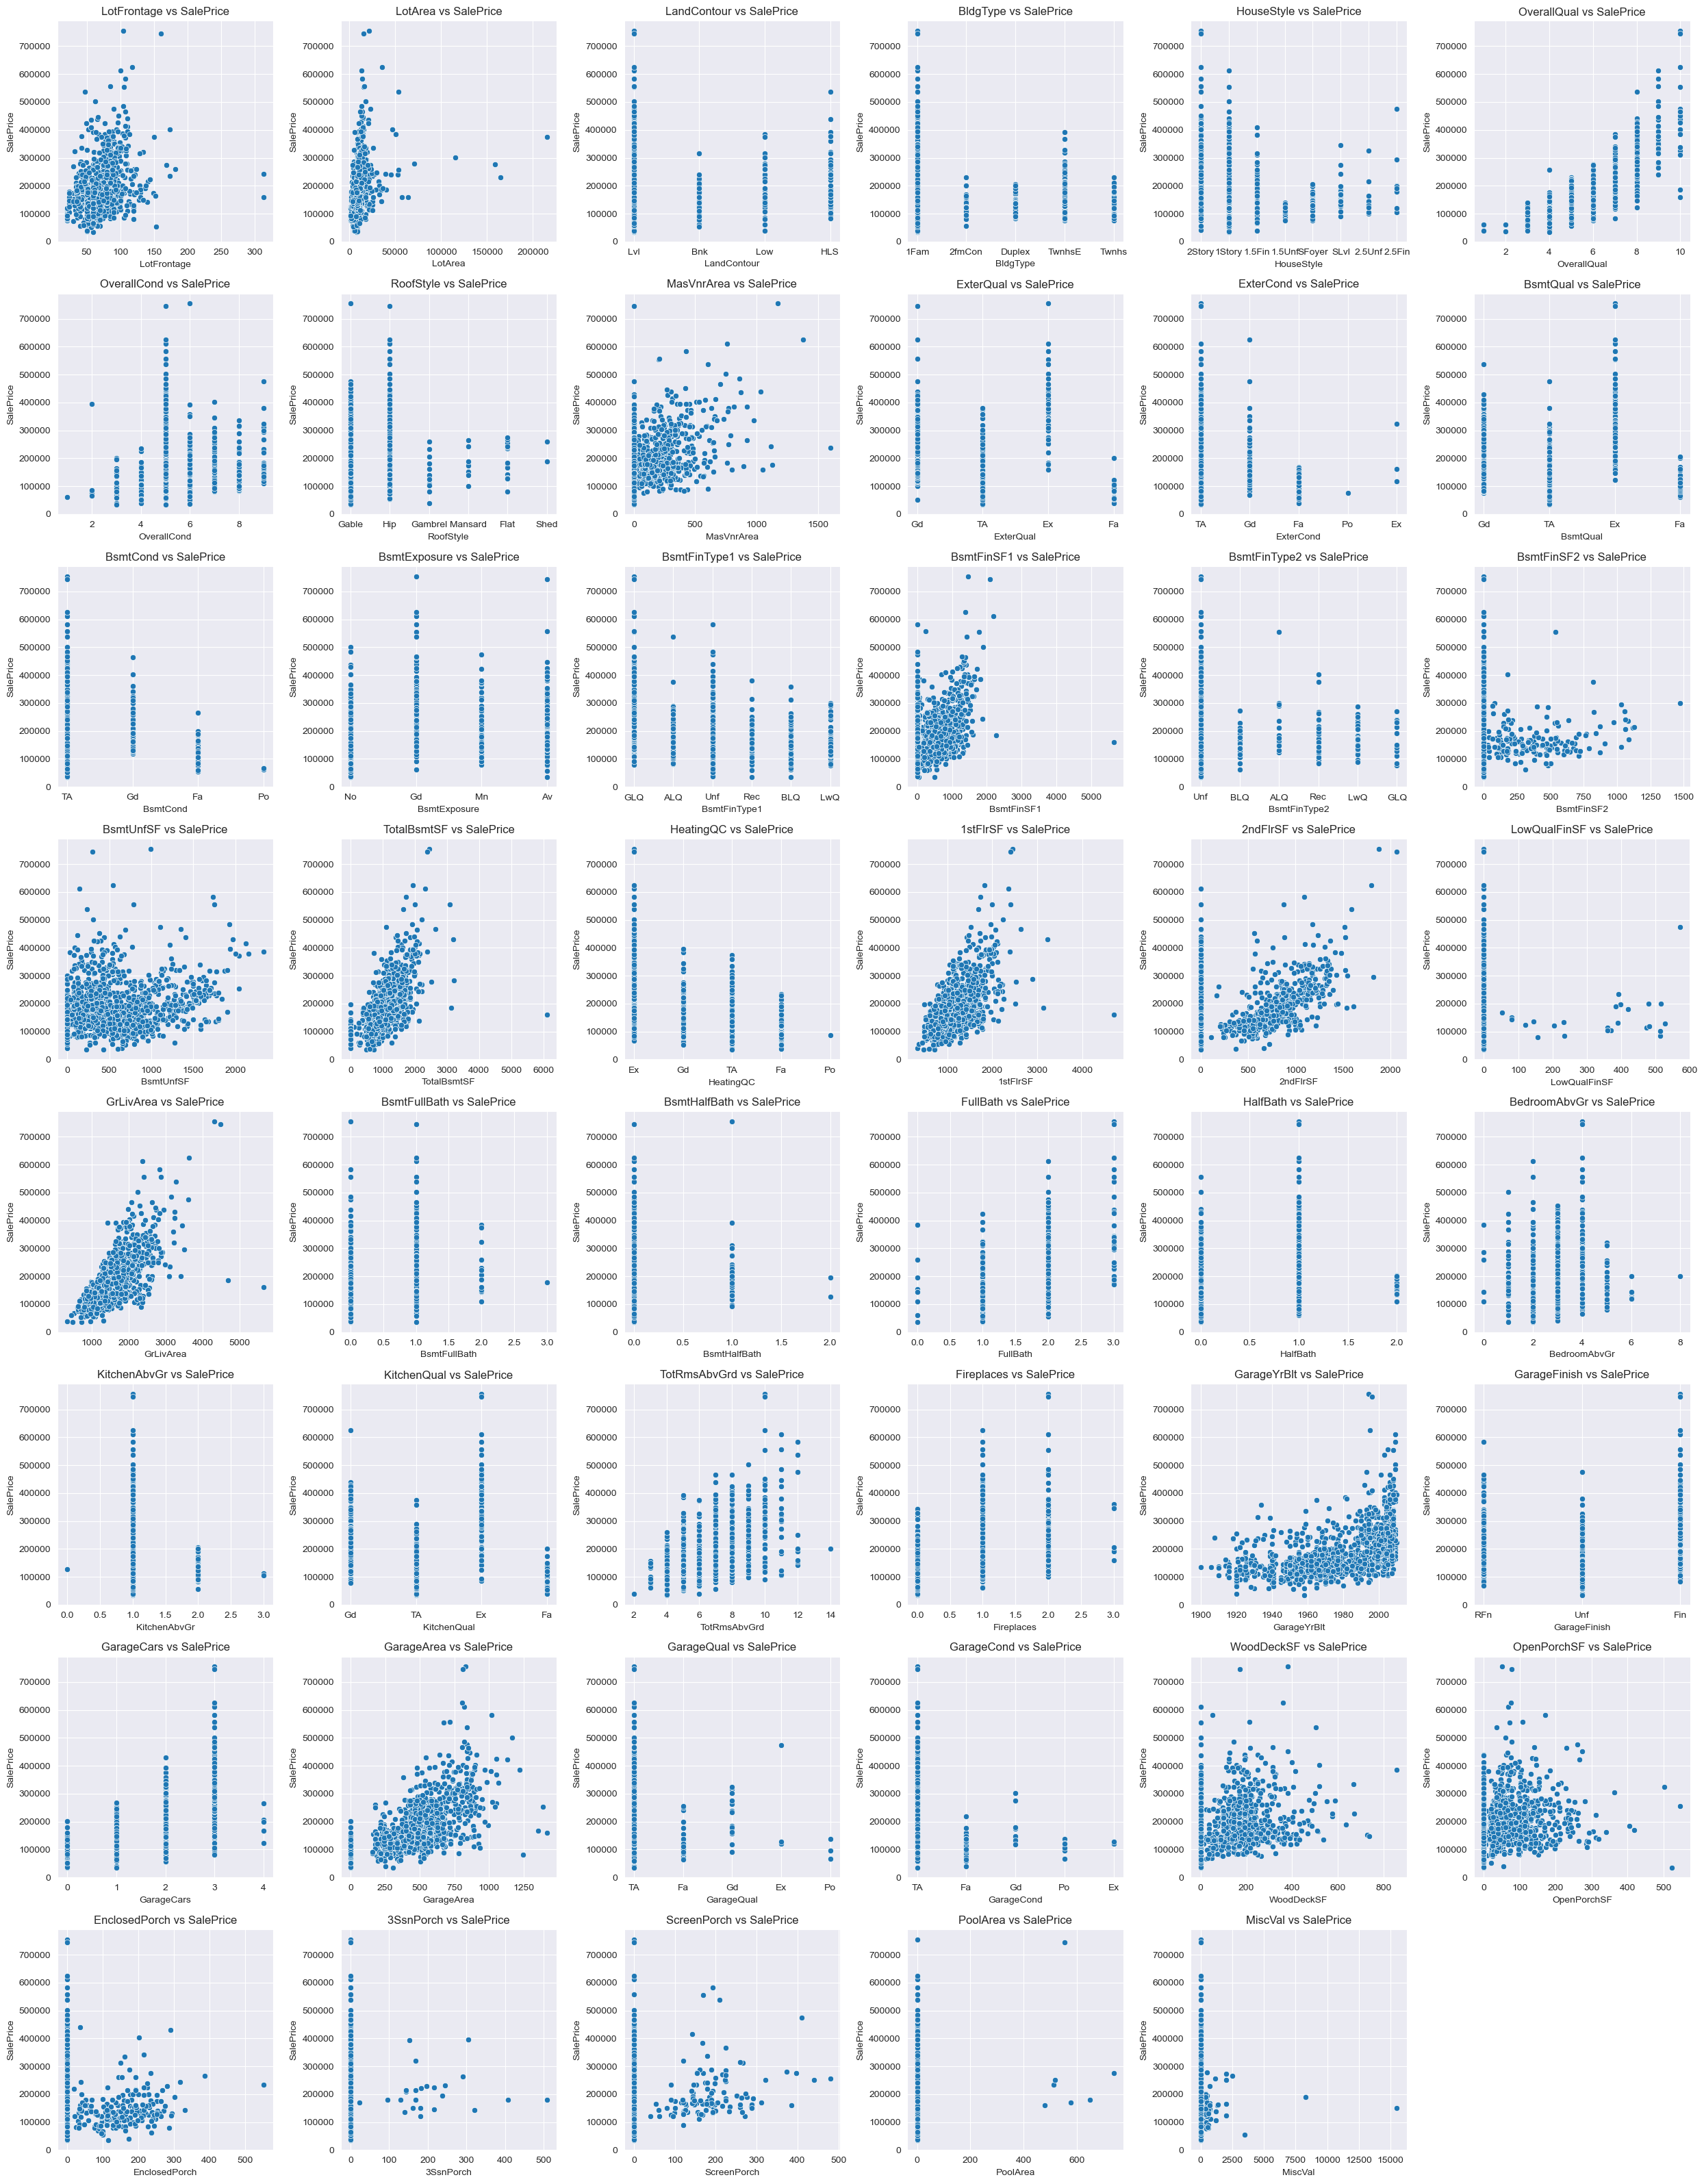

In [159]:

# Assuming 'dataset' is your DataFrame
df = dataset.copy()  # Make a copy to avoid modifying the original dataset

# List of features to visualize
features = df.columns.tolist() 
features.remove('SalePrice') 
target = 'SalePrice'

# Number of rows and columns for subplots
num_rows = 8
num_cols = 6

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 4*num_rows))
axes = axes.flatten() 

# Plot each feature and calculate skewness
for i, feature in enumerate(features):
    # Plotting scatterplot
    sns.scatterplot(x=df[feature], y=df[target], ax=axes[i])
    axes[i].set_title(f'{feature} vs {target}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<br>

<b>2.2 Sale Price</b>

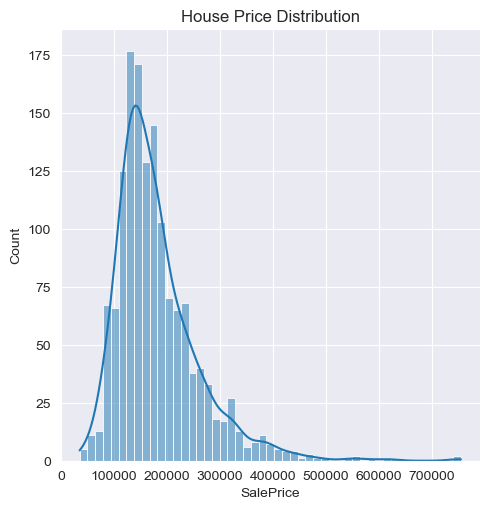

In [160]:
saleprice = dataset["SalePrice"]
sns.displot(saleprice,kde = True)
plt.title("House Price Distribution")
plt.show()


From the plot the distribution of ```SalePrice``` data is apparently right skewed. Its Skewness and Kurtosis statistics are checked.This was expected as few people can afford very expensive houses. 


In [161]:
print(f"""Skewness: {saleprice.skew()}
Kurtosis: {saleprice.kurt()}""")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


<br>

<b>2.3 Numerical Features </b>

There are total 31 numercial features. 

In [162]:
numerical_data = df.select_dtypes(include="number")
numerical_list = numerical_data.columns.tolist()
numerical_list.remove("SalePrice")
print("Number of numerical variables：" , len(numerical_list))

Number of numerical variables： 31


<br>

<b>Correlation coefficient with target variable</b>

To have a first glance of which numeric variables have a high correlation with the ```SalePrice```. The correlation coefficient is computed. All coefficient>0.4 is initially defined as a relative strong linear relationship and visualized. 
However, it is clear that the multicollinearity is an issue. For example: the correlation between ```GarageCars``` and ```GarageArea``` is very high (0.89), while both have relatively high correlations with ```SalePrice```.


<div style="text-align: left;">

| Pearson Correlation Range | Strength of Correlation | Interpretation |
|:---------------------------|:-------------------------|:----------------|
| 0.7 to 1.0 (positive or negative) | Strong | Indicates a strong linear relationship where one variable tends to increase (or decrease) as the other variable increases. |
| 0.5 to 0.7 (positive or negative) | Moderate to Strong | Suggests a meaningful linear relationship between the variables, though not as strong as the highest range. |
| 0.3 to 0.5 (positive or negative) | Weak to Moderate | The relationship exists but is less pronounced and may not be as influential in linear models. |
| 0 to 0.3 (positive or negative) | Weak or No Correlation | Indicates a weak linear relationship or no linear relationship between the variables. |


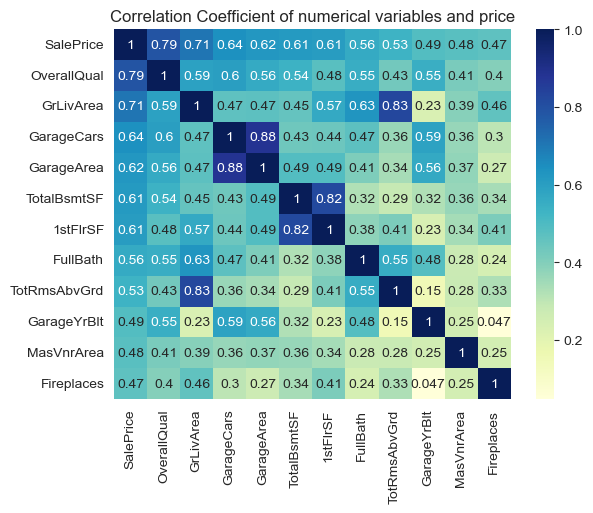

In [163]:
corr = numerical_data.corr()

corr_sorted = corr["SalePrice"].sort_values(ascending=False)
corr_high = corr_sorted[abs(corr_sorted)>0.4].index.tolist()
corr_numVar = corr.loc[corr_high,corr_high]

sns.heatmap(corr_numVar, cmap="YlGnBu", annot=True)
plt.title("Correlation Coefficient of numerical variables and price")
plt.show()

<div align="left">

<b>Skewness</b>

| Skewness Range          | Description                                                                                   |
|:------------------------|:----------------------------------------------------------------------------------------------|
| Near Zero (0)           | Data is symmetric, with skewness between -0.5 and 0.5.                                         |
| Moderate Skewness       | Data is moderately asymmetric, with skewness between -1 to -0.5 or 0.5 to 1.                  |
| High Skewness           | Data is highly skewed, with skewness greater than 1 or less than -1. Transformations needed.   |

</div>

Skewed Features: ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


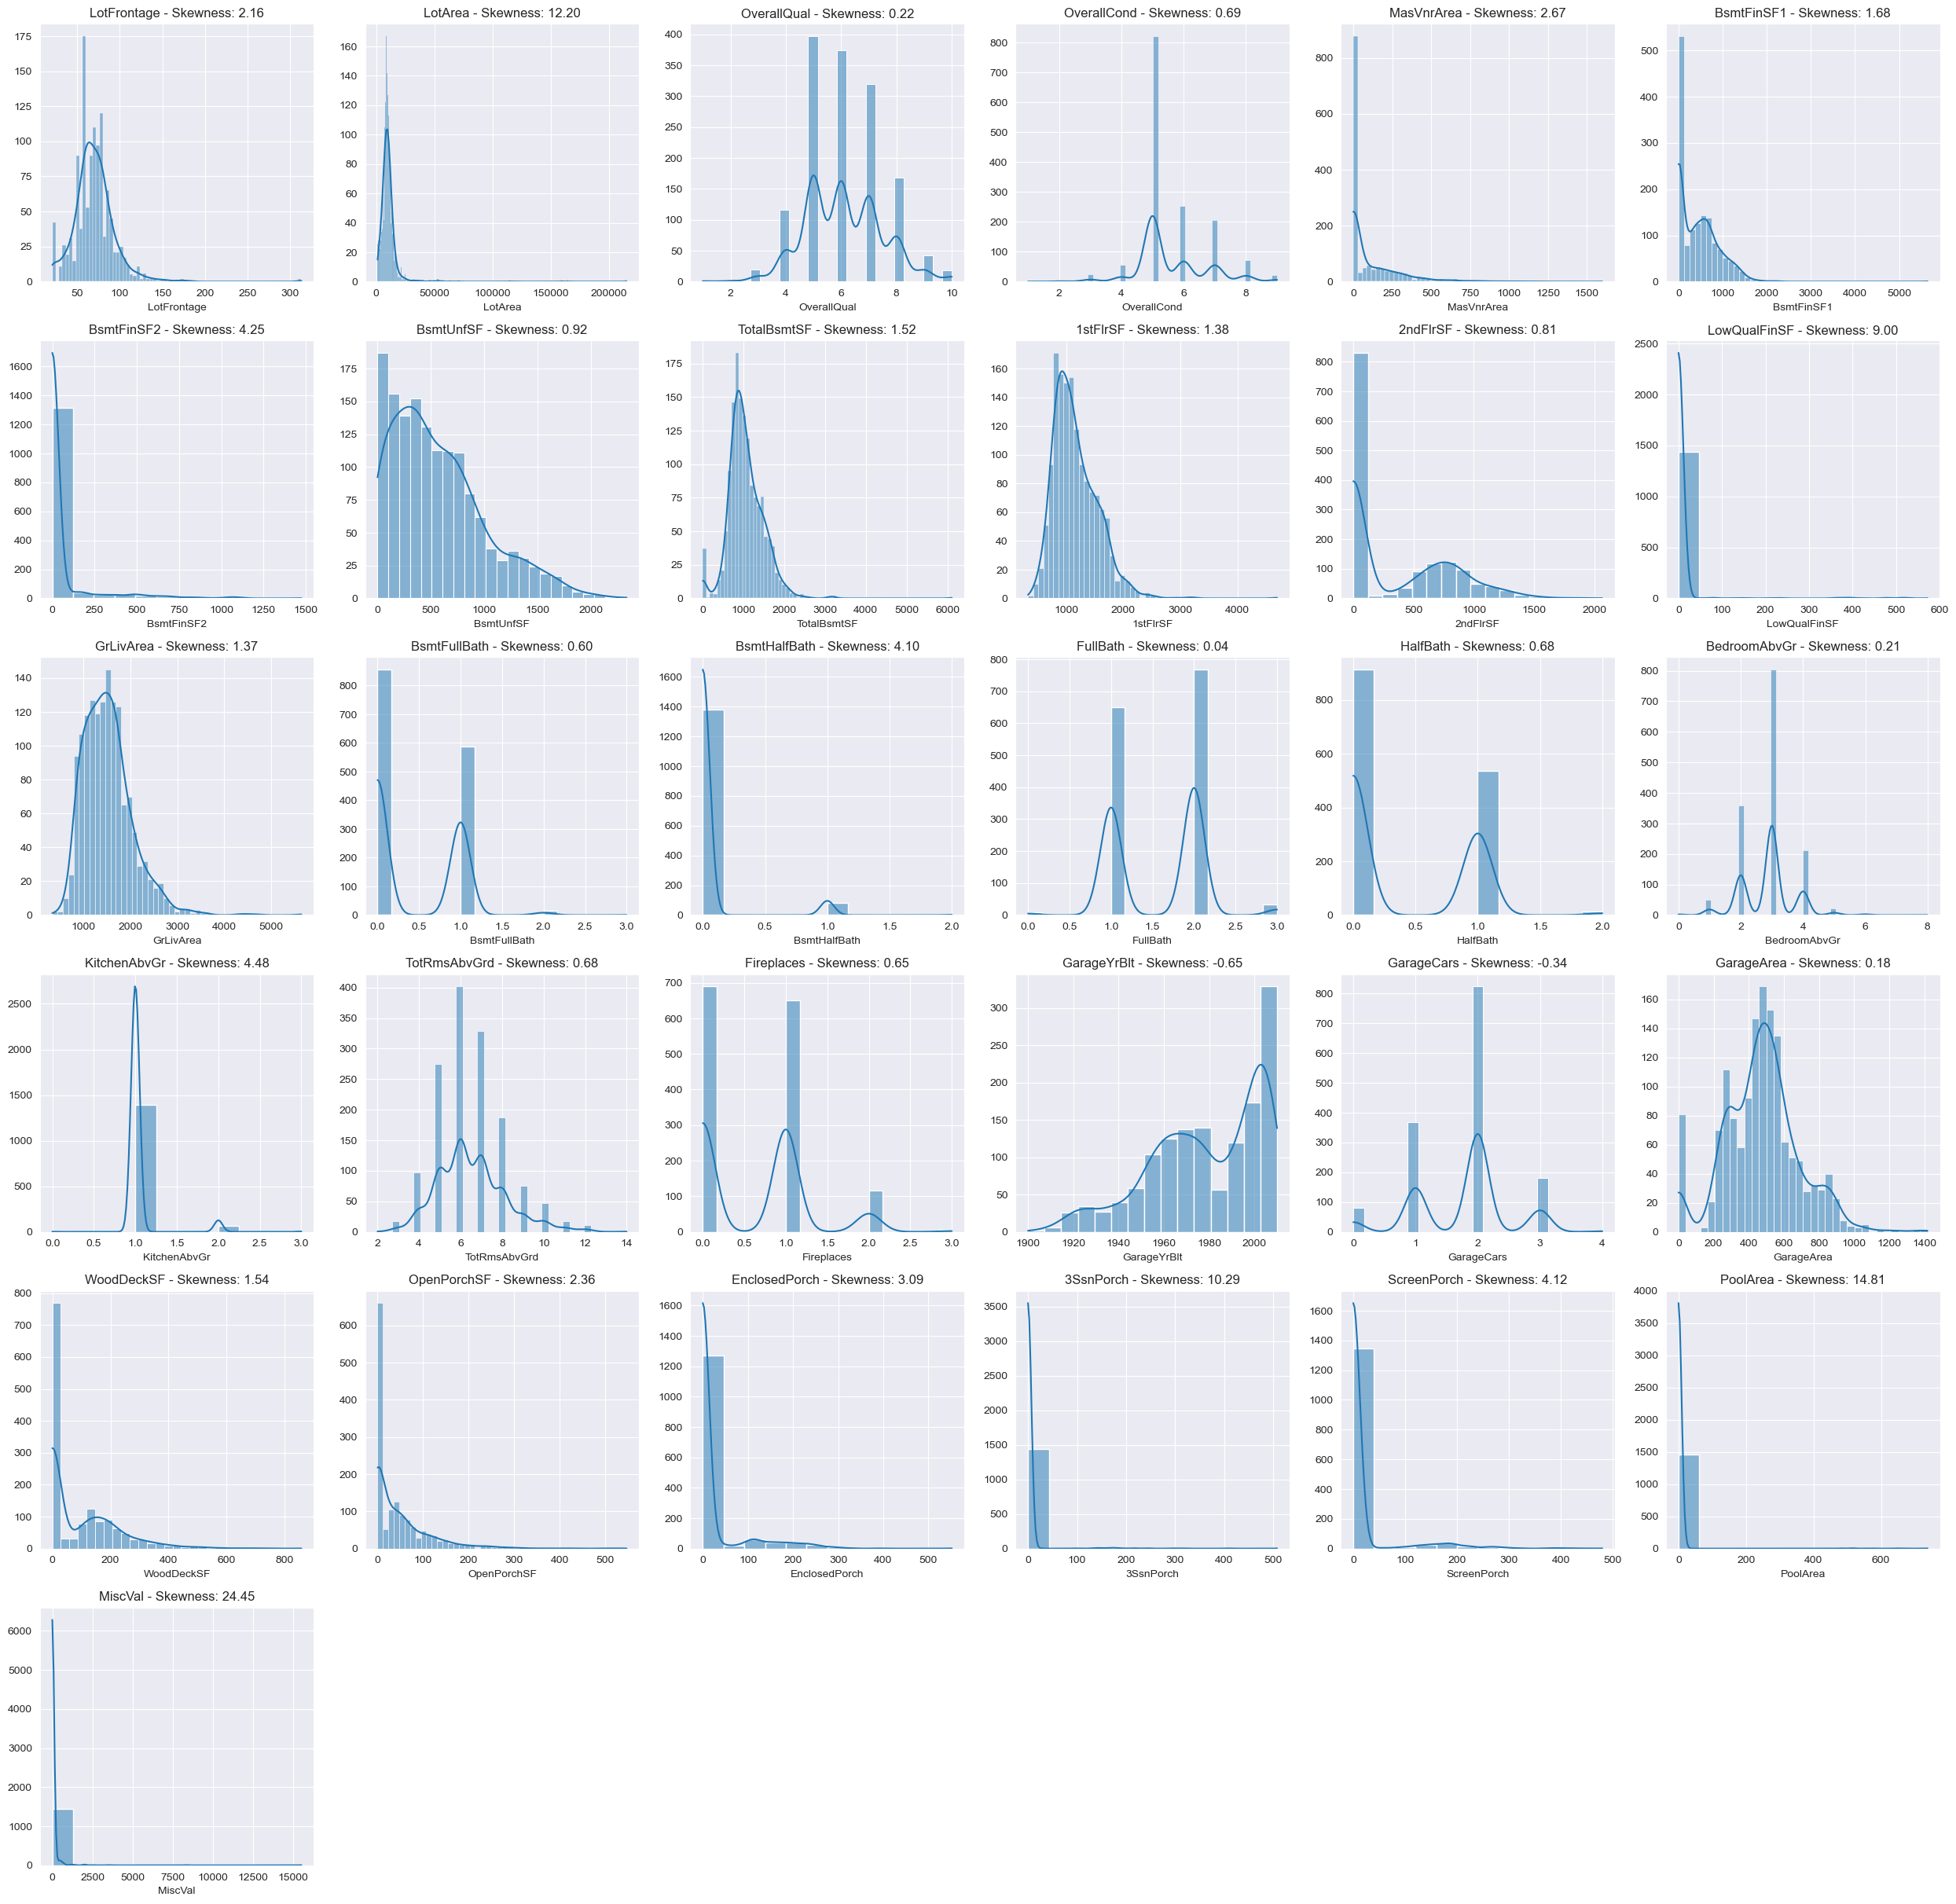

In [164]:
# Make a copy of numerical_data to avoid modifying the original dataset
numerical = numerical_data.drop(columns=["SalePrice"]).copy()
features = numerical.columns.tolist()
skewed_features = []

num_rows = 8
num_cols = 6

# Create subplots for visualization
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 4*num_rows))
axes = axes.flatten()

# Iterate over each feature
for i, feature in enumerate(features):
    # Plot histogram with KDE (Kernel Density Estimate)
    sns.histplot(numerical[feature], kde=True, ax=axes[i])
    
    # Calculate skewness for the current feature
    skewness = skew(numerical[feature].dropna())
    
    # Identify and store features with skewness greater than 1
    if skewness > 1:
        skewed_features.append(feature)
    
    axes[i].set_title(f'{feature} - Skewness: {skewness:.2f}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('')
    
print("Skewed Features:", skewed_features)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<div style="text-align: left;">

<br>

<b>Characteristics summary of numercial variable derived from EDA </b>

<br>

| Numercial Variable       | Characteristics summary derived from EDA                              |
|:----------------|:--------------------------------------------------|
| LotFrontage    | Skewed data, initially had outliers, strong correlation with SalePrice. |
| LotArea        | Skewed data, initially had outliers, moderate correlation with SalePrice. |
| OverallQual    | Strong positive correlation with SalePrice.       |
| OverallCond    | Weak negative correlation with SalePrice.         |
| MasVnrArea     | Skewed data, moderate correlation with SalePrice. |
| BsmtFinSF1     | Skewed data, moderate correlation with SalePrice. |
| BsmtFinSF2     | Skewed data, low correlation with SalePrice.      |
| BsmtUnfSF      | Low correlation with SalePrice.                  |
| TotalBsmtSF    | Skewed data, initially had outliers, strong correlation with SalePrice. |
| 1stFlrSF       | Skewed data, moderate correlation with SalePrice. |
| 2ndFlrSF       | Low correlation with SalePrice.                   |
| LowQualFinSF   | Low correlation with SalePrice.                   |
| GrLivArea      | Skewed data, strong correlation with SalePrice.   |
| BsmtFullBath   | Low correlation with SalePrice.                   |
| BsmtHalfBath   | Skewed data, low correlation with SalePrice.      |
| FullBath       | Moderate correlation with SalePrice.              |
| HalfBath       | Low correlation with SalePrice.                   |
| BedroomAbvGr   | Low correlation with SalePrice.                   |
| KitchenAbvGr   | Skewed data, weak negative correlation with SalePrice. |
| TotRmsAbvGrd   | Moderate correlation with SalePrice.              |
| Fireplaces     | Moderate correlation with SalePrice.              |
| GarageYrBlt    | Low correlation with SalePrice.                   |
| GarageCars     | Moderate correlation with SalePrice.              |
| GarageArea     | Moderate correlation with SalePrice.              |
| WoodDeckSF     | Skewed data, moderate correlation with SalePrice.  |
| OpenPorchSF    | Skewed data, moderate correlation with SalePrice.  |
| EnclosedPorch  | Low correlation with SalePrice.                   |
| 3SsnPorch      | Low correlation with SalePrice.                   |
| ScreenPorch    | Low correlation with SalePrice.                   |
| PoolArea       | Low correlation with SalePrice.                   |
| MiscVal        | Skewed data, initially had outliers, low correlation with SalePrice. |


<br>

<b>2.4 Categorical Features </b>

There are total 16 categorical features. 

In [165]:
categorical_data = df.select_dtypes(exclude="number")
categorical_list = categorical_data.columns.tolist()
print("Number of categorical variables：" , len(categorical_list))

Number of categorical variables： 16


In [166]:
print(categorical_list)

['LandContour', 'BldgType', 'HouseStyle', 'RoofStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageFinish', 'GarageQual', 'GarageCond']




To have an initial feel of categorical variables 's characteristics. The cardinality of categorical variables is visualized. Categorical variables with high cardinality (i.e. ```HouseStyle```, ```RoofSytle```, ```BsmtFinType1```, and ```BsmtFinType2```) may have a significant impact on the analysis or modeling process.


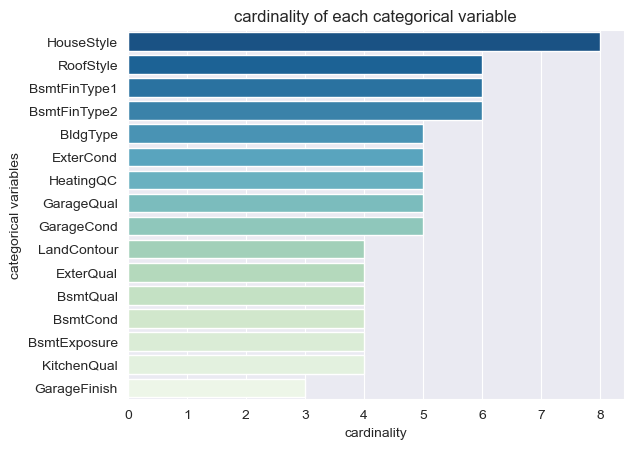

In [167]:
cardinality = {var: df[var].nunique() for var in categorical_list}
cardinality_df = pd.DataFrame(cardinality.items(), columns=["Variable", "Cardinality"])
cardinality_df=cardinality_df.sort_values(by="Cardinality",ascending=False)

sns.barplot(y=cardinality_df["Variable"],x=cardinality_df["Cardinality"],data=cardinality_df, palette="GnBu_r")
plt.ylabel("categorical variables")
plt.xlabel("cardinality")
plt.title("cardinality of each categorical variable")
plt.show()

<br>

# 3. Data Preprocessing

<br>

<b>3.1 Missing Value</b>

For numerical variables, given that the missing percentage for ```LotFrontage``` and ```GarageYrBlt``` is relatively high (17.7% and 5.5% respectively), creating missing value indicators is more suitable compared to other approaches such as mean imputation. Each of these variables are replaced by a new variable that works as a missing value indicator. If the value in the original variable is missing then the corresponding value in the new variable should be 1, otherwise it should be 0. 


31


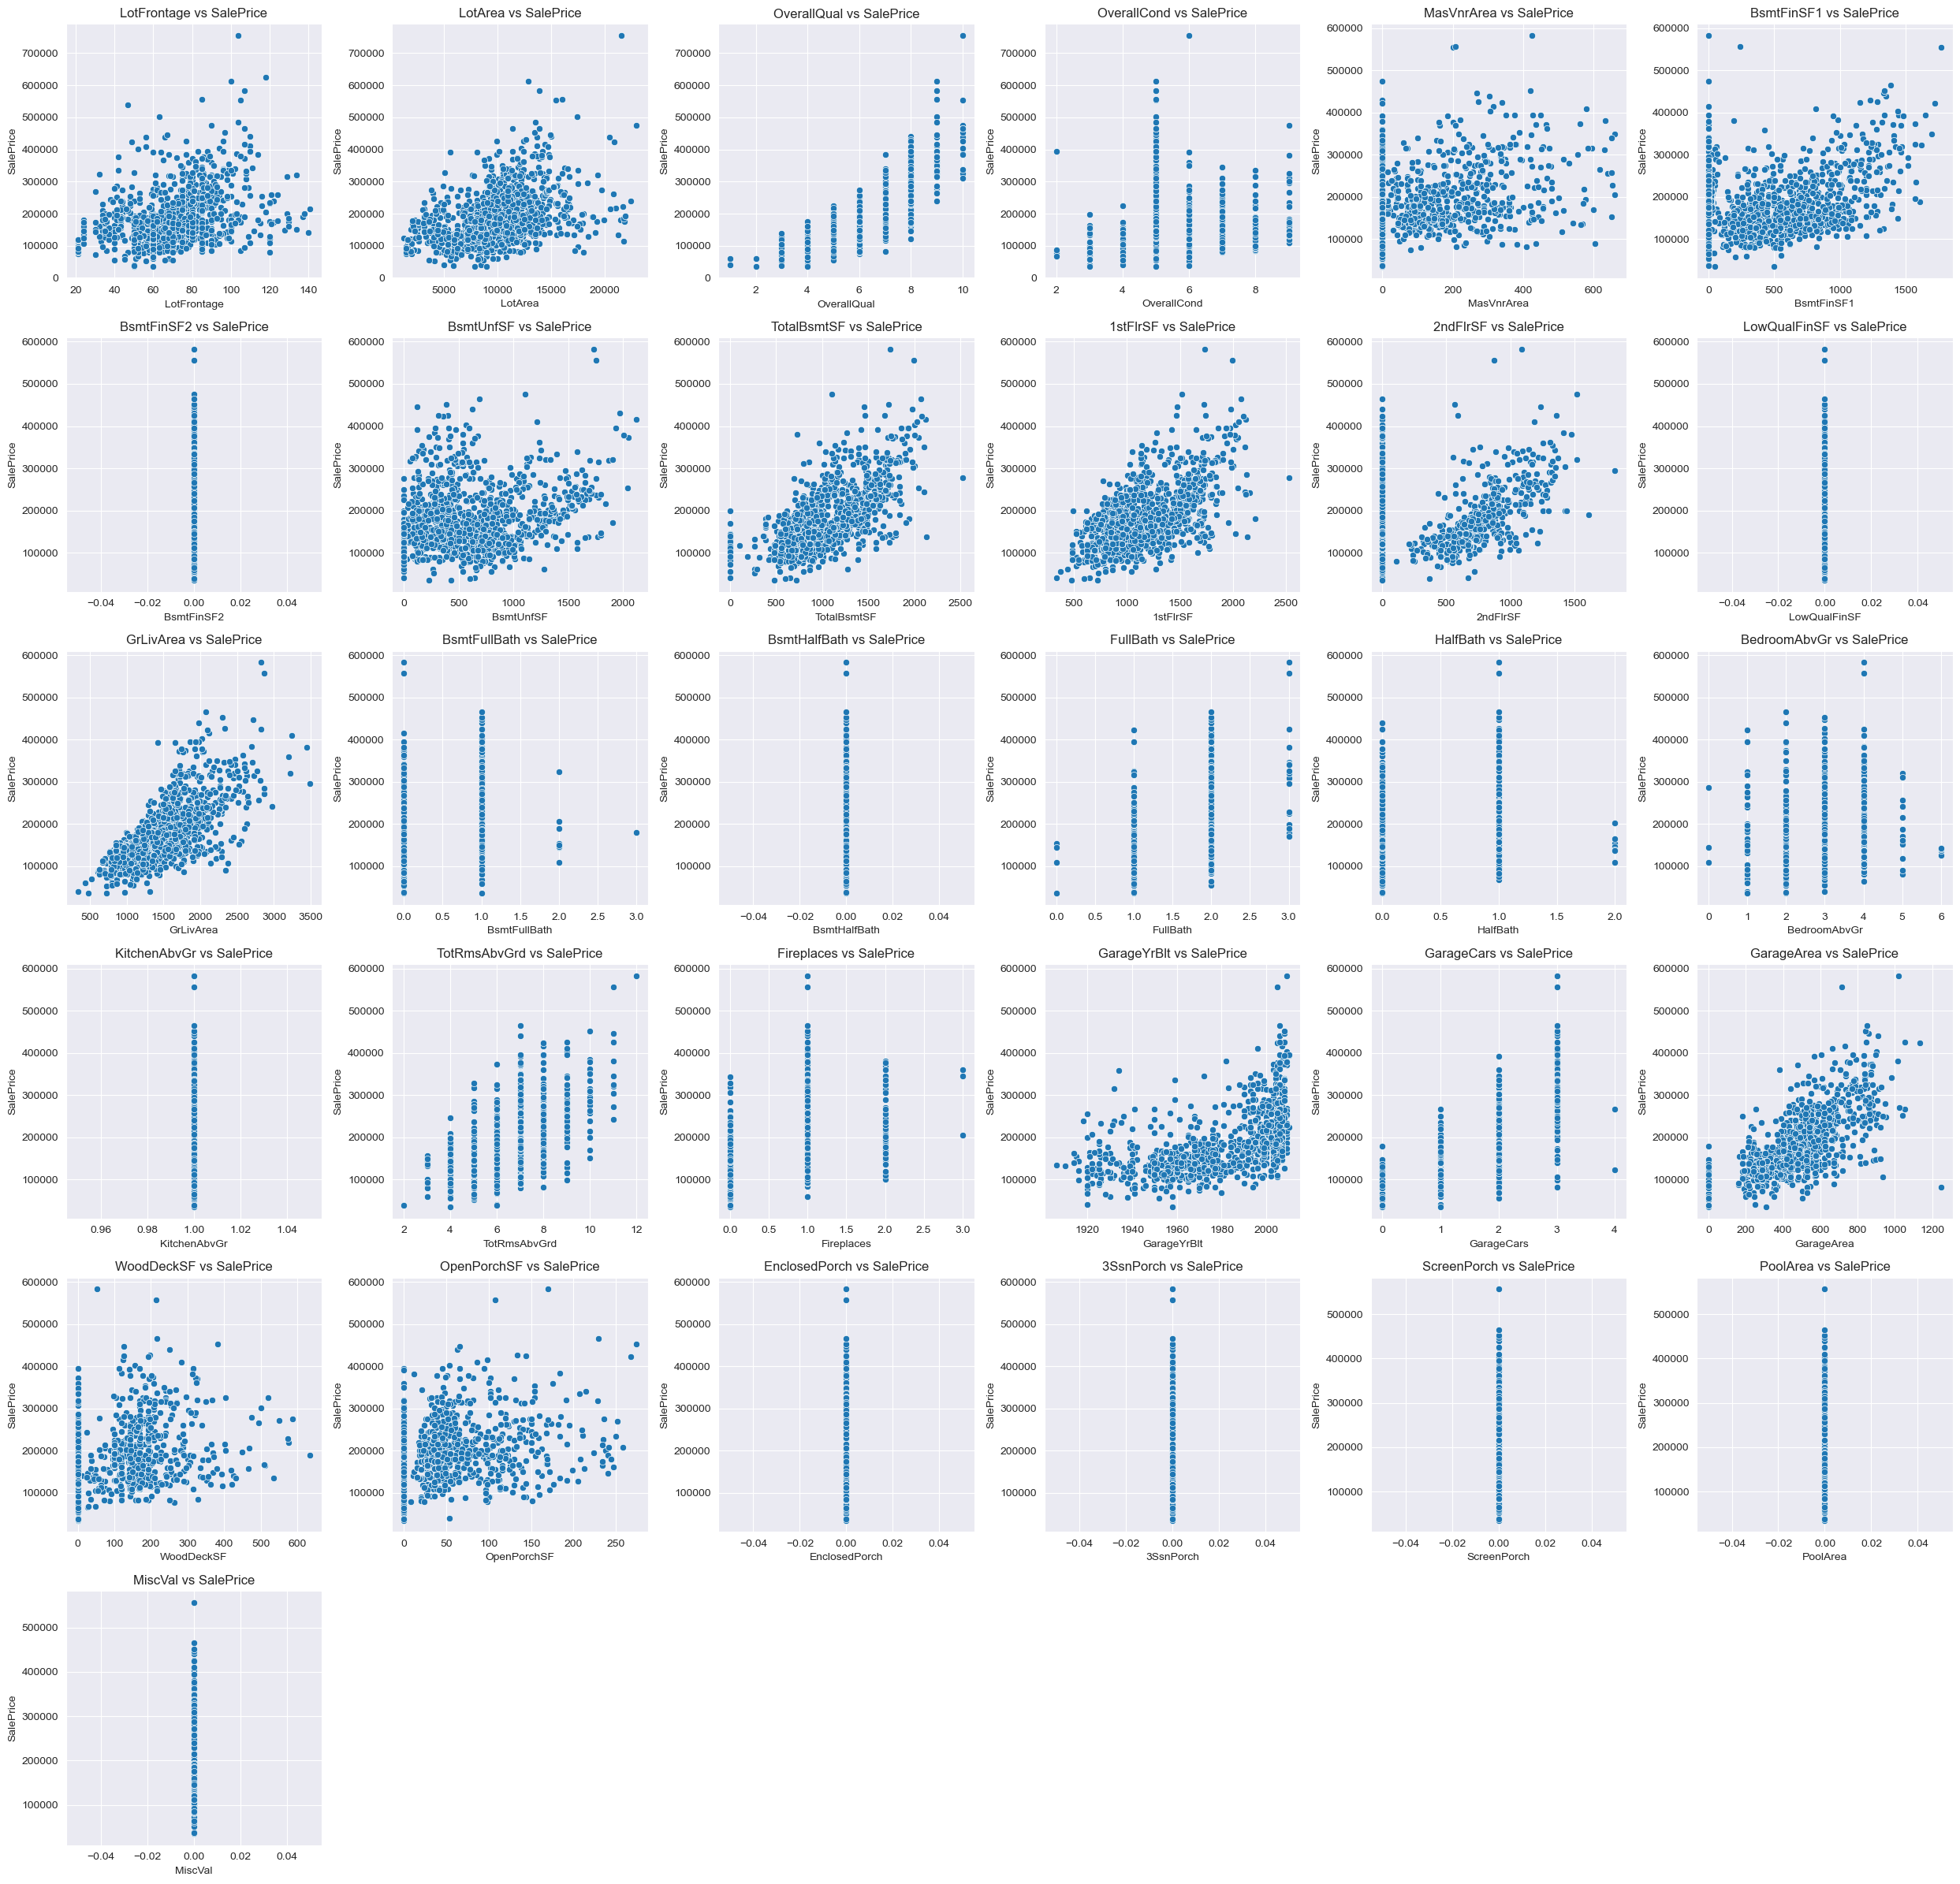

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to process
# Remove outliers and plot
n_cols = 6  # Number of plots per row
n_rows = (len(numerical_list) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 4 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration
num_outlier=0
for i, column in enumerate(numerical_list):
    if column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR

        # Identify outliers
        outliers = df[(df[column] > upper_bound) | (df[column] < lower_bound)].index
        df.drop(outliers, inplace=True)

        # Plot each column in the subplot
        sns.scatterplot(x=df[column], y=df['SalePrice'], ax=axes[i])
        axes[i].set_title(f'{column} vs SalePrice')
        num_outlier+=1

print(num_outlier)
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [169]:
numerical_missing = numerical_data.isna().sum().sort_values(ascending=False)
numerical_missing_percent = numerical_missing/len(numerical_data) * 100
numerical_missing_data = pd.DataFrame({ 
                                     "Percent": numerical_missing_percent, 
                                     "Count": numerical_missing})
numerical_missing_data.head(10)

,Percent,Count
LotFrontage,17.739726,259
GarageYrBlt,5.547945,81
MasVnrArea,0.547945,8
BedroomAbvGr,0.000000,0
MiscVal,0.000000,0
PoolArea,0.000000,0
ScreenPorch,0.000000,0
3SsnPorch,0.000000,0
EnclosedPorch,0.000000,0
OpenPorchSF,0.000000,0


In [170]:
vars_with_missing = []
for var in df.select_dtypes(include="number").columns:
   if df[var].isnull().any():
      vars_with_missing.append(var)
for var in vars_with_missing:
   df[var+"_missing"] = df[var].isnull().astype(int)
   df.drop(columns=[var],inplace=True)

sum(df.select_dtypes(include="number").isna().sum())

0

For categorical variables, the proportion of missing values is relatively low (```GarageFinish```, ```GarageQual```, and ```BsmtExposure`` range between 2.5% and 5.5%, this is considered low) and unlikely to skew the data. Mode imputation for categorical variables replaces missing values with the most frequent category.

In [171]:
categorical_missing = categorical_data.isna().sum().sort_values(ascending=False)
categorical_missing_percent = categorical_missing/len(categorical_data) * 100
categorical_missing_data = pd.DataFrame({ 
                                     "Percent": categorical_missing_percent, 
                                     "Count": categorical_missing})
categorical_missing_data.head(10)

,Percent,Count
GarageFinish,5.547945,81
GarageQual,5.547945,81
GarageCond,5.547945,81
BsmtExposure,2.602740,38
BsmtFinType2,2.602740,38
BsmtQual,2.534247,37
BsmtCond,2.534247,37
BsmtFinType1,2.534247,37
LandContour,0.000000,0
BldgType,0.000000,0


In [172]:
for column in categorical_data.columns:   
   mode_value = df[column].mode()[0]
   df[column].fillna(mode_value,inplace=True)
sum(df.select_dtypes(exclude="number").isna().sum())

0

All missing values have been handled!

<br>

<b>3.2 Label Encoding</b>

Many machine learning algorithms require numerical input. Label encoding is necessary to transform these categories into numerical values. All ordinal categorical variables are encoded into   numbers based on the mean value of the target variable (```SalePrice```). The smaller value corresponds to the category that has the smaller mean house sale price. That is. the category that has the smallest mean house sale price can be replaced with 0, the next category with 1, and 
so on. Compared to one-hot encoding, which creates binary columns for each category, this approach reduces the dimensionality of the feature space.


In [173]:
cat_vars = df.select_dtypes(exclude=['number']).columns

for var in cat_vars:
    # Calculate mean sale price for each category in the training set
    mean_sale_price = df.groupby(var)['SalePrice'].mean().sort_values()
    
    # Create a mapping dictionary for encoding
    encoding_map = {category: i for i, category in enumerate(mean_sale_price.index)}
    
    # Apply encoding to both training and testing datasets
    # Define the default value to assign to missing values in the test dataset
    # This value represents the encoding for missing categories that were not present in the training dataset
    df["encoded_" + var] = df[var].map(encoding_map)
    df["encoded_" + var] = df[var].map(encoding_map)
    
    # Drop original categorical variables
    df.drop(columns=[var], inplace=True)


<br>

<b>3.3 Remove outliers</b>

Exploratory data analysis (EDA) has identified outliers in the GrLivArea variable. Since regression models are sensitive to outliers, these outliers need to be removed to improve model accuracy.

In [174]:
# sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'],data=df)
# plt.show()

In [175]:
# outlier=df[df['GrLivArea']>4000].index
# print(outlier)
# df.drop(outlier,inplace=True,axis=0)

<br>

# 4. Feature Engineering

<br>

<b>4.1 Split Data into Training and Testing Sets</b>

<br>

Split the data into training and test sets, with 70% for training and 30% for testing. This step is done after data preprocessing but before transformation and standardization to prevent data leakage.

In [176]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.3, random_state=10)

<br>
<b>4.2 Fixing skewness with Log Transformation</b>

The target variable(```SalePrice```) is right skewed as shown before. Since normal distribution is crucial for linear regression, a log transformation is performed on skewed data to approximate a normal distribution. From distribution plot and QQ plot, the transformed data is approximately normally distributed.

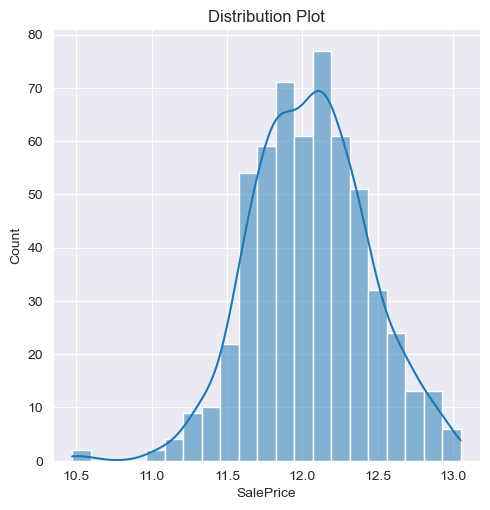

In [177]:
train_df['SalePrice'] = np.log(train_df['SalePrice'])
test_df['SalePrice'] = np.log(test_df['SalePrice'])

sns.displot(train_df["SalePrice"], kde=True)
plt.title("Distribution Plot")
plt.show()

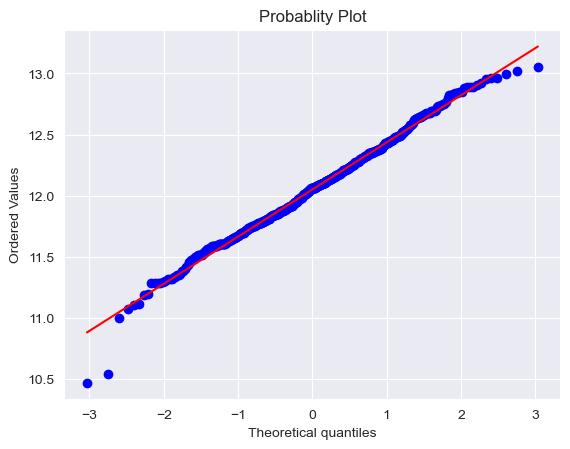

In [178]:
stats.probplot(train_df["SalePrice"], dist="norm", plot=plt)
plt.title("Probablity Plot")
plt.show()

<br>
<b>4.3 Filter and Wrapper</b>

In [179]:
from sklearn.feature_selection import VarianceThreshold

y_train= train_df['SalePrice']
y_test= test_df['SalePrice']

X_train = train_df.drop('SalePrice', axis=1) 
X_test = test_df.drop('SalePrice', axis=1) 

variances = X_train.var(axis=0)
threshold_n=0.95

sel = VarianceThreshold(threshold=threshold_n*(1-threshold_n))
X_train_filtered = sel.fit_transform(X_train)
X_test_filtered = sel.transform(X_test)

idx = np.where(sel.variances_>threshold_n)[0]
mask = X_train.columns[sel.get_support(indices=True)]
X_train_filtered = pd.DataFrame(X_train_filtered,columns=mask)
X_test_filtered = pd.DataFrame(X_test_filtered,columns=mask)

print(idx)
print(mask)

[ 0  1  3  5  6  7  8 10 17 20 21 22 33 39 40]
Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'LotFrontage_missing', 'encoded_LandContour', 'encoded_BldgType',
       'encoded_HouseStyle', 'encoded_RoofStyle', 'encoded_ExterQual',
       'encoded_ExterCond', 'encoded_BsmtQual', 'encoded_BsmtCond',
       'encoded_BsmtExposure', 'encoded_BsmtFinType1', 'encoded_HeatingQC',
       'encoded_KitchenQual', 'encoded_GarageFinish'],
      dtype='object')


Number of selected features:  28
[ 1  8  5  6 15  3 16 10 26  0  7 32  4  2 24 18 13 29 25 17 30 12 28 31
  9 14 11 20 21 27 23 22 19]


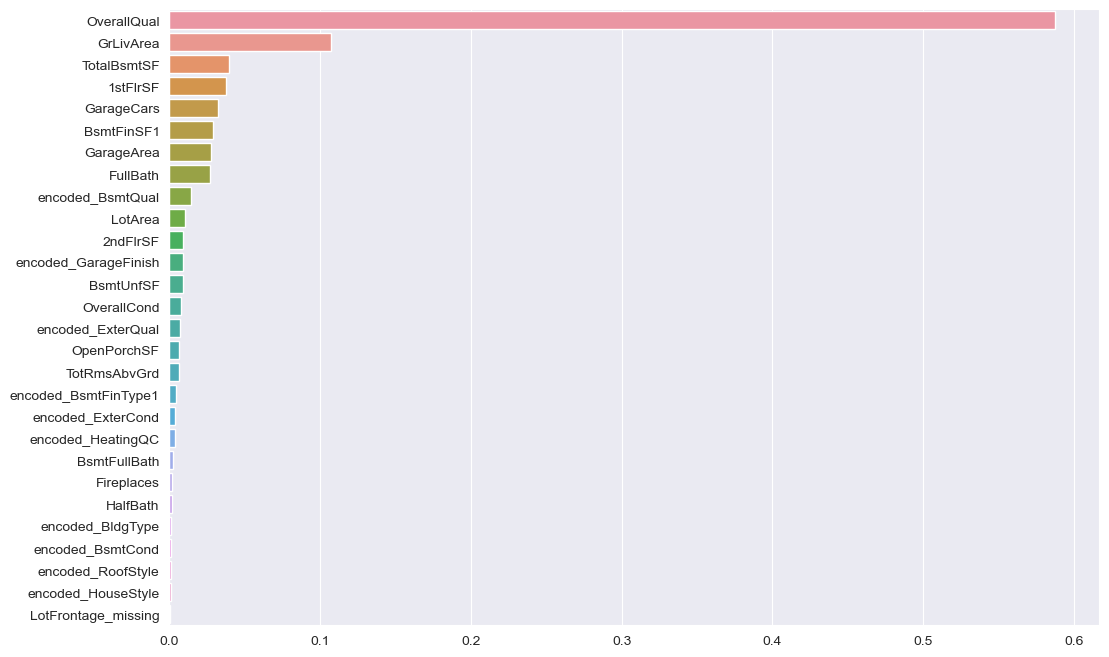

In [180]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=7)
wrap = model.fit(X_train_filtered, y_train)
importances=model.feature_importances_
indices = np.argsort(importances)[::-1]

threshold_r = 0.001
filtered_importance = np.where(importances>threshold_r)[0]
sorted_indices = indices[filtered_importance]

selected_feature = X_train_filtered.columns[sorted_indices]

print("Number of selected features: ",len(sorted_indices))
print(indices)

plt.figure(figsize=(12,8))
sns.barplot(x=importances[sorted_indices],y=np.array(X_train_filtered.columns)[sorted_indices])
plt.show()


In [181]:
from sklearn.feature_selection import RFE

model_rfe = RandomForestRegressor(random_state=7)

rfe = RFE(estimator=model_rfe, n_features_to_select=len(sorted_indices))
fit = rfe.fit(X_train_filtered, y_train)

X_train_wrapper = pd.DataFrame(fit.transform(X_train_filtered),columns=selected_feature)
X_test_wrapper = pd.DataFrame(fit.transform(X_test_filtered),columns=selected_feature)

<br>
<b>4.3 Standardization and transformation</b>

Standardization (or z-score normalization) is necessary to ensure all variables have the same scale for comparisons. It transforms the data to have a mean of 0 and a standard deviation of 1. 
$$ x'_i = \frac{x_i - \mu}{\sigma} $$


In [182]:
from sklearn.preprocessing import StandardScaler

# Standardize the features to have mean=0 and variance=1
# StandardScaler can help mitigate overflow issues by scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_wrapper)
X_test_scaled = scaler.transform(X_test_wrapper)


<br>
To mitigate skewness observed during EDA, Yeo-Johnson transformation is implemented to address skewed data distributions by applying a power transformation after z-score normalization. This method adjusts the data distribution to approximate normality, thereby improving the suitability of the data for robust and accurate predictions.




\begin{cases} 
\frac{(y + 1)^{\lambda} - 1}{\lambda} & \text{if } y \geq 0, \lambda \neq 0 \\
\ln(y + 1) & \text{if } y \geq 0, \lambda = 0 \\
\frac{-(|y| + 1)^{2 - \lambda} - 1}{2 - \lambda} & \text{if } y < 0, \lambda \neq 2 \\
-\ln(|y| + 1) & \text{if } y < 0, \lambda = 2
\end{cases}

<br>



In [183]:
from sklearn.preprocessing import PowerTransformer

# Apply the Yeo-Johnson transformation to the standardized features
# PowerTransformer with 'yeo-johnson' method handles non-positive data, but overflow may still occur
pt = PowerTransformer(method='yeo-johnson')
X_train_transformed = pt.fit_transform(X_train_scaled)
X_test_transformed = pt.transform(X_test_scaled)

# Convert transformed arrays back to DataFrame
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train_wrapper.columns)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=X_test_wrapper.columns)


In [184]:
mean_before = X_train_wrapper.mean()
std_before = X_train_wrapper.std()

mean_after = X_train_transformed_df.mean()
std_after = X_train_transformed_df.std()

summary_df = pd.DataFrame(
    {'Feature': X_train_wrapper.columns,
    'Mean Before': mean_before.values,
    'Std Before': std_before.values,
    'Mean After standardalization and transformation': mean_after,
    'Std After standardalization and transformation': std_after}
)

summary_df.head(10)

,Feature,Mean Before,Std Before,Mean After standardalization and transformation,Std After standardalization and transformation
OverallQual,OverallQual,9114.345009,3459.971449,3.947028e-17,1.000877
GrLivArea,GrLivArea,6.246935,1.403118,-4.024802e-17,1.000877
TotalBsmtSF,TotalBsmtSF,5.430823,0.944065,2.469323e-17,1.000877
1stFlrSF,1stFlrSF,438.176883,428.568820,1.102446e-16,1.000877
GarageCars,GarageCars,619.644483,452.785835,3.499827e-17,1.000877
BsmtFinSF1,BsmtFinSF1,1057.821366,384.437716,3.110958e-18,1.000877
GarageArea,GarageArea,1129.656743,344.544425,-1.011061e-17,1.000877
FullBath,FullBath,336.751313,427.798462,-8.671795e-17,1.000877
encoded_BsmtQual,encoded_BsmtQual,1466.408056,460.363670,2.333218e-18,1.000877
LotArea,LotArea,0.418564,0.507770,-9.297875e-16,1.000877


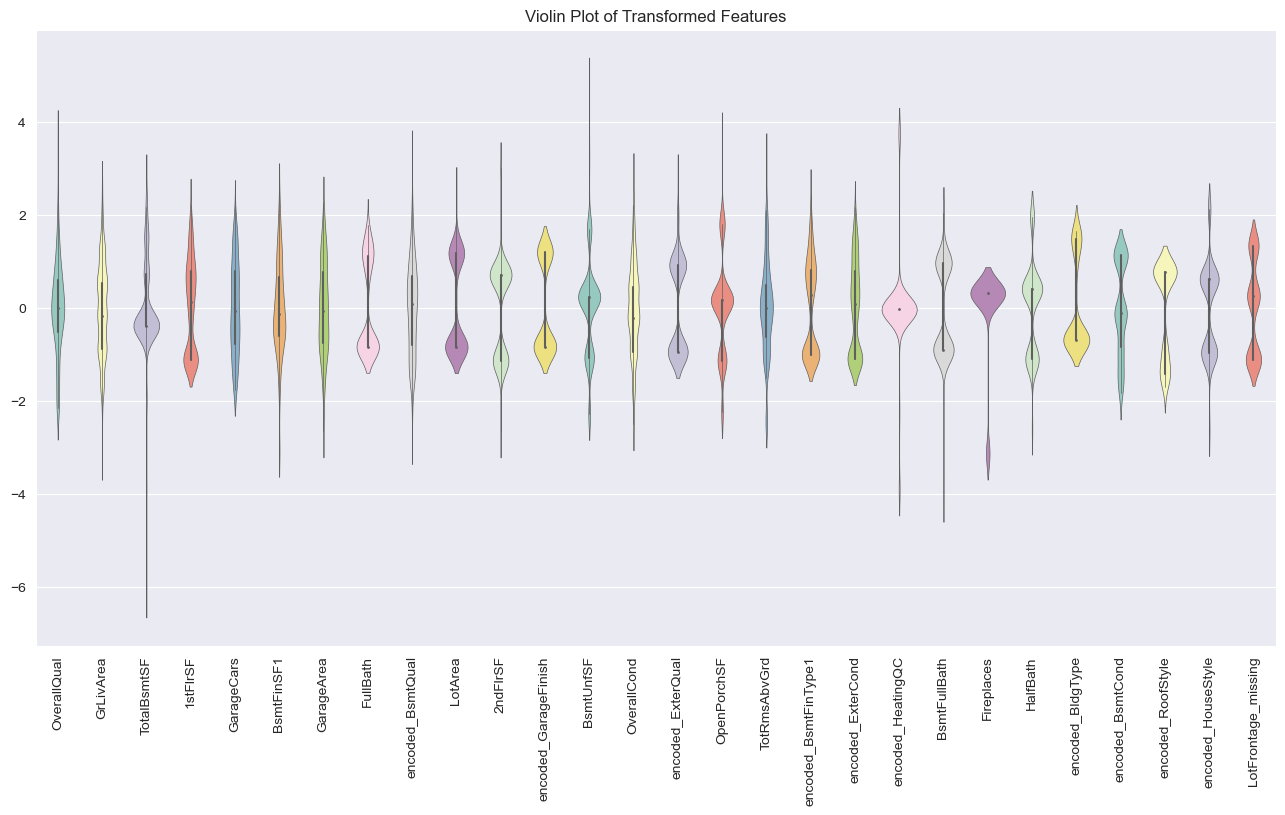

In [185]:
plt.figure(figsize=(16, 8))
sns.violinplot(data=X_train_transformed_df, palette='Set3',orient='v', linewidth=0.5)
plt.title('Violin Plot of Transformed Features')
plt.xticks(rotation=90)
plt.show()

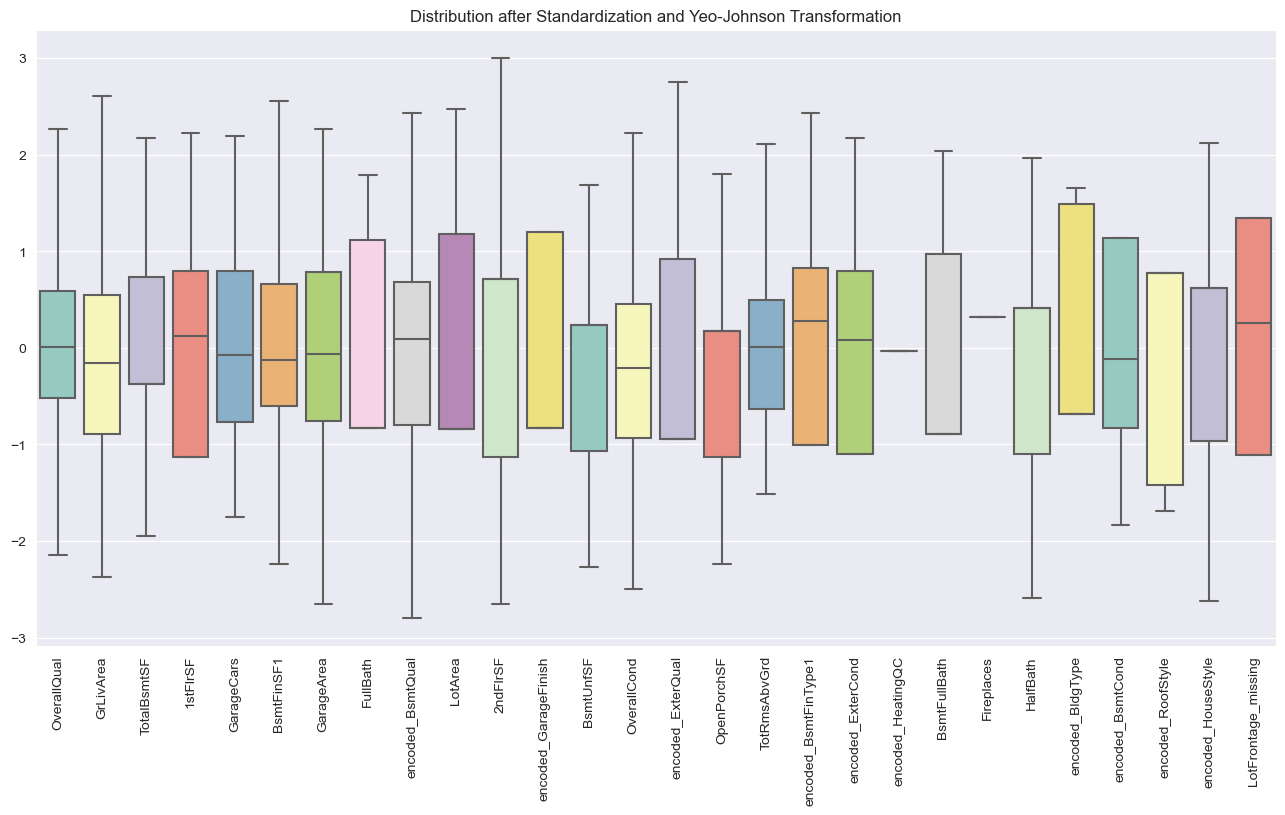

In [186]:
# Box plot comparing original, standardized, and transformed distributions
plt.figure(figsize=(16, 8))
sns.boxplot(data=X_train_transformed_df, orient="v", palette='Set3', showfliers=False)
plt.title('Distribution after Standardization and Yeo-Johnson Transformation')
plt.xticks(rotation = 90)
plt.show()


Apparently from the boxplot some featuress including```ScreenPorch```, ```LotFrontage```have low variance, indicating these features do not provide siginicant information and can be filtered.

In [187]:
X_test_transformed_df

,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,GarageCars,BsmtFinSF1,GarageArea,FullBath,encoded_BsmtQual,LotArea,...,encoded_ExterCond,encoded_HeatingQC,BsmtFullBath,Fireplaces,HalfBath,encoded_BldgType,encoded_BsmtCond,encoded_RoofStyle,encoded_HouseStyle,LotFrontage_missing
0,-1.496152,0.547739,-0.377372,-1.128162,0.231945,-1.153801,-1.766537,0.969512,-0.399237,-0.837664,...,0.511706,-0.03001,0.968965,0.31987,0.415871,-0.685237,-0.112576,0.778060,0.622436,1.342356
1,2.152842,1.925553,-0.377372,1.888093,0.005598,2.215691,2.007323,-0.830734,1.114953,1.180254,...,0.327911,-0.03001,0.968965,0.31987,1.960512,1.485032,1.133235,0.778060,2.122141,1.342356
2,0.040778,1.241577,-0.377372,1.241648,-0.125201,1.066230,1.025292,1.536039,2.145282,1.180254,...,0.716281,-0.03001,0.968965,0.31987,0.415871,-0.685237,1.133235,-0.887698,0.622436,1.342356
3,0.270990,1.241577,-0.377372,1.383493,-1.220879,0.464281,0.418732,1.272226,1.302536,1.180254,...,0.700655,-0.03001,0.968965,0.31987,0.415871,-0.685237,1.133235,0.778060,0.622436,0.259315
4,0.229423,-0.161042,-0.377372,-1.128162,1.562162,0.986242,1.477448,-0.830734,0.580442,-0.837664,...,-1.094530,-0.03001,-0.895457,0.31987,-1.099103,-0.685237,-0.112576,-1.688283,-0.960754,-1.110877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,-0.403726,-0.887997,-0.377372,0.494244,-1.000851,-0.727116,-1.125564,-0.830734,-1.732477,-0.837664,...,-1.094530,-0.03001,-0.895457,0.31987,-1.099103,-0.685237,-1.586041,-0.887698,-0.960754,-1.110877
242,1.412629,0.547739,-0.377372,-1.128162,0.743466,-0.429914,-0.702068,1.385214,0.907494,-0.837664,...,-0.456579,-0.03001,0.968965,0.31987,0.415871,1.485032,-0.112576,0.778060,0.622436,1.342356
243,-0.258428,-0.887997,1.525320,-0.566567,0.391539,-0.471499,-0.760075,-0.830734,-1.460713,1.180254,...,-1.094530,-0.03001,-0.895457,0.31987,-1.099103,-0.685237,-1.268252,-1.417070,-0.960754,-1.110877
244,0.457130,0.547739,-0.377372,-1.128162,1.633533,1.122385,1.077753,-0.830734,0.178443,-0.837664,...,0.031793,-0.03001,0.968965,0.31987,0.415871,1.485032,-0.112576,0.778060,0.622436,0.259315


<br>

# 5. Modeling

<br>

<b>5.1 KFold and Cross-validation</b>

<br>

In machine learning, evaluating the performance of a model is crucial to ensure its effectiveness on unseen data. Cross-validation is a technique used to achieve this by splitting the data into multiple subsets, training the model on some subsets, and evaluating it on others.

In [188]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

num_folds = 10
seed = 7

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)


<br>

<b>5.2 Evaluate Function</b>

<br>
To streamline the evaluation process for multiple models, a evaluate function is defined. It fits the model, performs cross-validation, calculates metrics (RMSE and R-squared), and plots residuals.

In [189]:
def evaluate_model(model, X_train_transformed_df, y_train, X_test_transformed_df, y_test):
    model.fit(X_train_transformed_df,y_train)

    scores = cross_val_score(model,X_train_transformed_df,y_train,cv=kfold,scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print("RMSE Scores for each fold:", rmse_scores)

    y_predict = model.predict(X_test_transformed_df)
    mse = mean_squared_error(y_test, y_predict)
    r_squared = r2_score(y_test,y_predict)
    print("R-squared:", r_squared)
    print("Mean Squared Error:", mse)

    y_test_rescaled = np.exp(y_test)
    y_pred_rescaled = np.exp(y_predict)
    residuals = y_test_rescaled - y_pred_rescaled

    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, bins=20)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title('Histogram of Residuals')
    plt.show()


<br>

<b>5.3 Candidate models</b>

<br>

<b>5.3.1 LinearRegression</b>

<br>


RMSE Scores for each fold: [0.11909885 0.09570957 0.15256688 0.11230547 0.14502937 0.10969366
 0.09856047 0.14465786 0.11715607 0.1060386 ]
R-squared: 0.9062370438904005
Mean Squared Error: 0.01430928131863001


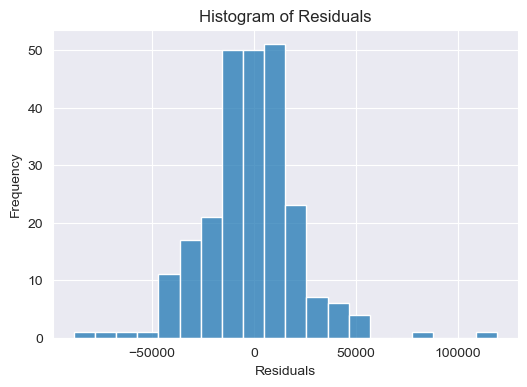

In [190]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(
    fit_intercept=True,   # Whether to calculate the intercept for this model
    n_jobs=None           # The number of jobs to use for the computation. -1 means using all processors
)

evaluate_model(model, X_train_transformed_df, y_train, X_test_transformed_df, y_test)

<br>

<b>5.3.2 RidgeRegression</b>

<br>

Recommended alpha  9.782228970785825
Recommended tol  0.010000977989511996
Recommended max_iter  625
RMSE Scores for each fold: [0.12007371 0.09442221 0.15352298 0.11062168 0.14301735 0.10976461
 0.09997454 0.14468644 0.11603621 0.10601213]
R-squared: 0.9076109876624214
Mean Squared Error: 0.014099602051192603


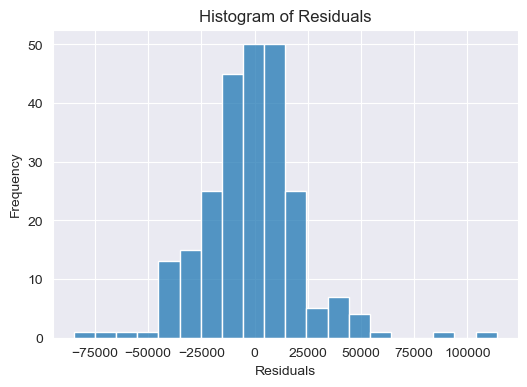

In [65]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import uniform,randint

#  Set up the RandomizedSearchCV with appropriate distributions and ranges and find
model = Ridge(random_state=seed)
param_grid = {'alpha': uniform(0,10),'tol':uniform(0.01,0.000001),'max_iter':randint(10,1000)}
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=seed)
rsearch.fit(X_train_transformed_df, y_train)

print("Recommended alpha ", rsearch.best_estimator_.alpha)
print("Recommended tol ", rsearch.best_estimator_.tol)
print("Recommended max_iter ", rsearch.best_estimator_.max_iter)

# Define Ridge model
model = Ridge(
    alpha=rsearch.best_estimator_.alpha,             # Regularization strength (higher values imply stronger regularization)
    fit_intercept=True,                              # Whether to calculate the intercept for this model
    max_iter=rsearch.best_estimator_.max_iter,       # Maximum number of iterations for optimization. None means until convergence.
    tol=rsearch.best_estimator_.tol,                 # Precision of the solution
    solver='auto',                                   # Algorithm to use in the optimization problem ('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga')
    random_state=seed                                # Seed used by the random number generator
)

evaluate_model(model, X_train_transformed_df, y_train, X_test_transformed_df, y_test)

<br>

<b>5.3.3 RandomForestRegression</b>

<br>

RMSE Scores for each fold: [0.09893152 0.09475912 0.18370296 0.15826665 0.15682039 0.09370734
 0.13532155 0.15019337 0.10260196 0.13731984]
R-squared: 0.8831525003433816
Mean Squared Error: 0.017832242213125963


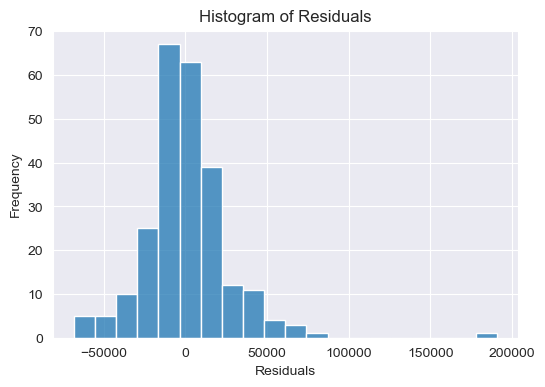

In [46]:
from sklearn.ensemble import RandomForestRegressor

# Define Random Forest model
model = RandomForestRegressor(
    n_estimators=100,      # Number of trees in the forest
    criterion='squared_error',       # Function to measure the quality of a split ('mse' for Mean Squared Error)
    max_depth=None,        # Maximum depth of the trees. None means nodes are expanded until all leaves are pure or contain less than min_samples_split samples
    min_samples_split=2,   # Minimum number of samples required to split an internal node
    min_samples_leaf=1,    # Minimum number of samples required to be at a leaf node
    bootstrap=True,        # Whether bootstrap samples are used when building trees
    random_state=seed,     # Seed used by the random number generator for reproducibility
    n_jobs=None            # The number of jobs to run in parallel for both fit and predict (-1 means using all processors)
)

evaluate_model(model, X_train_transformed_df, y_train, X_test_transformed_df, y_test)


In [1]:
import xgboost
from xgboost import XGBRegressor



ModuleNotFoundError: No module named 'xgboost'

Pipeline

In [211]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer, StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer

# Custom transformer to remove outliers (dummy implementation)
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X  # Placeholder, replace with actual logic


# Custom transformer to handle missing values (dummy implementation)
class MissingValueHandler(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Implement missing value handling logic here
        return X  # Placeholder, replace with actual logic


# Custom transformer for categorical encoding (dummy implementation)
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Implement categorical encoding logic here
        return X  # Placeholder, replace with actual logic


# Custom transformer for logarithmic transformation
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return np.log(X)  # Logarithmic transformation

class TrainTestSplit(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return x  # Logarithmic transformation

# Define preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('outlier_removal', OutlierRemover()),
    ('missing_value_handler', MissingValueHandler()),
    ('categorical_encoder', CategoricalEncoder()),
])

# Define feature engineering pipeline
feature_engineering_pipeline = Pipeline([
    ('train_test_split', TrainTestSplit()),
    ('log_transform', LogTransformer()),
    ('filter', VarianceThreshold(threshold=0.95)),
    ('wrapper', RFE(estimator=RandomForestRegressor(random_state=7), n_features_to_select=5)),
    ('scaler', StandardScaler()),
    ('power_transform', PowerTransformer(method='yeo-johnson'))
])

# Define modeling pipeline
modeling_pipeline = Pipeline([
    ('model', LinearRegression())
])

# Combine preprocessing, feature engineering, and modeling pipelines
main_pipeline = Pipeline([
    ('Preprocessing', preprocessing_pipeline),
    ('Feature_engineering', feature_engineering_pipeline),
    ('Modeling', modeling_pipeline)
])

main_pipeline


Pipeline(steps=[('Preprocessing',
                 Pipeline(steps=[('outlier_removal', OutlierRemover()),
                                 ('missing_value_handler',
                                  MissingValueHandler()),
                                 ('categorical_encoder',
                                  CategoricalEncoder())])),
                ('Feature_engineering',
                 Pipeline(steps=[('train_test_split', TrainTestSplit()),
                                 ('log_transform', LogTransformer()),
                                 ('filter', VarianceThreshold(threshold=0.95)),
                                 ('wrapper',
                                  RFE(estimator=RandomForestRegressor(random_state=7),
                                      n_features_to_select=5)),
                                 ('scaler', StandardScaler()),
                                 ('power_transform', PowerTransformer())])),
                ('Modeling', Pipeline(steps=[('model', LinearRegression())]))])